### Unit 4: Linear Regression with Scikit-Learn

### Task A - Correlation

Import libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np

Load datasets

In [42]:
gdp_df = pd.read_csv('Global_GDP.csv')
population_df = pd.read_csv('Global_Population.csv')

Get first rows of gdp dataframe

In [43]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


Get first rows of population dataframe

In [44]:
population_df.head()

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000


Check for missing values

In [45]:
print("Missing values in GDP data:\n", gdp_df.isnull().sum())
print("Missing values in Population data:\n", population_df.isnull().sum())


Missing values in GDP data:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              138
                 ... 
2016               10
2017               10
2018               10
2019               13
2020               25
Length: 65, dtype: int64
Missing values in Population data:
 Country Name    3
Country Code    5
Series Name     5
Series Code     5
1960            5
               ..
2017            5
2018            5
2019            5
2020            6
2021            6
Length: 66, dtype: int64


Drop missing values, replace missing numerical values in gdp with mean

In [46]:
missing_country_names = population_df[population_df['Country Name'].isnull()]
population_df.dropna(subset=population_df.select_dtypes(include='object').columns, inplace=True)
numerical_columns_gdp = gdp_df.select_dtypes(include=np.number).columns.tolist()
gdp_df[numerical_columns_gdp] = gdp_df[numerical_columns_gdp].fillna(gdp_df[numerical_columns_gdp].mean())
print("Missing values in GDP data:\n", gdp_df.isnull().sum())
print("Missing values in Population data:\n", population_df.isnull().sum())


Missing values in GDP data:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2016              0
2017              0
2018              0
2019              0
2020              0
Length: 65, dtype: int64
Missing values in Population data:
 Country Name    0
Country Code    0
Series Name     0
Series Code     0
1960            0
               ..
2017            0
2018            0
2019            0
2020            0
2021            0
Length: 66, dtype: int64


Mean population of each country (from 2001 to 2020 - 2021 not in index)

In [47]:
# Calculate the mean for the years 2001 to 2020 (2021 not in index) for each country
years = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
         '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for year in years:
    population_df[year] = pd.to_numeric(population_df[year], errors='coerce')


population_df['Mean_Population'] = population_df[years].mean(axis=1)

# Create a new DataFrame with Country and Mean GDP
mean_population_df = population_df[['Country Name', 'Country Code', 'Mean_Population']]

# Display the new DataFrame with mean GDP
print("Mean Population DataFrame:\n", mean_population_df)

Mean Population DataFrame:
                     Country Name Country Code  Mean_Population
1                    Afghanistan          AFG     3.021299e+07
2    Africa Eastern and Southern          AFE     5.321282e+08
3     Africa Western and Central          AFW     3.594714e+08
4                        Albania          ALB     2.935900e+06
5                        Algeria          DZA     3.685864e+07
..                           ...          ...              ...
262           West Bank and Gaza          PSE     3.850798e+06
263                        World          WLD     6.971252e+09
264                  Yemen, Rep.          YEM     2.363835e+07
265                       Zambia          ZMB     1.410907e+07
266                     Zimbabwe          ZWE     1.304740e+07

[266 rows x 3 columns]


Mean per capita GDP (from 2001 to 2020 - 2021 not in index)

In [48]:
# Calculate the mean for the years 2001 to 2020 (2021 not in index) for each country
gdp_df['Mean_GDP'] = gdp_df[years].mean(axis=1)

# Create a new DataFrame with Country and Mean GDP
mean_gdp_df = gdp_df[['Country Name', 'Country Code', 'Mean_GDP']]

# Display the new DataFrame with mean GDP
print("Mean GDP DataFrame:\n", mean_gdp_df)

Mean GDP DataFrame:
                     Country Name Country Code      Mean_GDP
0                          Aruba          ABW  2.906725e+11
1    Africa Eastern and Southern          AFE  7.441522e+11
2                    Afghanistan          AFG  6.471392e+10
3     Africa Western and Central          AFW  5.570494e+11
4                         Angola          AGO  7.868516e+10
..                           ...          ...           ...
261                       Kosovo          XKX  5.008561e+11
262                  Yemen, Rep.          YEM  3.114042e+11
263                 South Africa          ZAF  3.280526e+11
264                       Zambia          ZMB  1.740083e+10
265                     Zimbabwe          ZWE  1.253090e+10

[266 rows x 3 columns]


Merge datasets on country names and codes

In [49]:
merged_data = pd.merge(mean_gdp_df, mean_population_df, on=['Country Name', 'Country Code'])
merged_data.head()
merged_data.dropna(subset=merged_data.select_dtypes(include='object').columns, inplace=True)

Calculate Pearson correlation coefficient

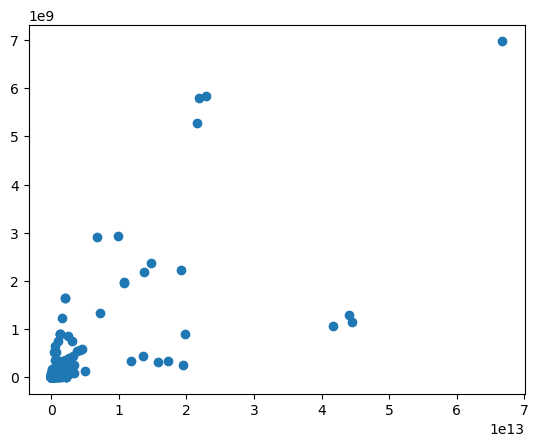

Pearsons correlation: 0.711


In [50]:
numerical_merged_data = merged_data.select_dtypes(include=np.number).columns.tolist()
merged_data[numerical_merged_data] = merged_data[numerical_merged_data].fillna(merged_data[numerical_merged_data].mean())

# calculate Pearson's correlation
corr, _ = pearsonr(merged_data['Mean_GDP'], merged_data['Mean_Population'])

#plot
plt.scatter(merged_data['Mean_GDP'], merged_data['Mean_Population'])
plt.show()

print('Pearsons correlation: %.3f' % corr)


### Task B: Linear Regression

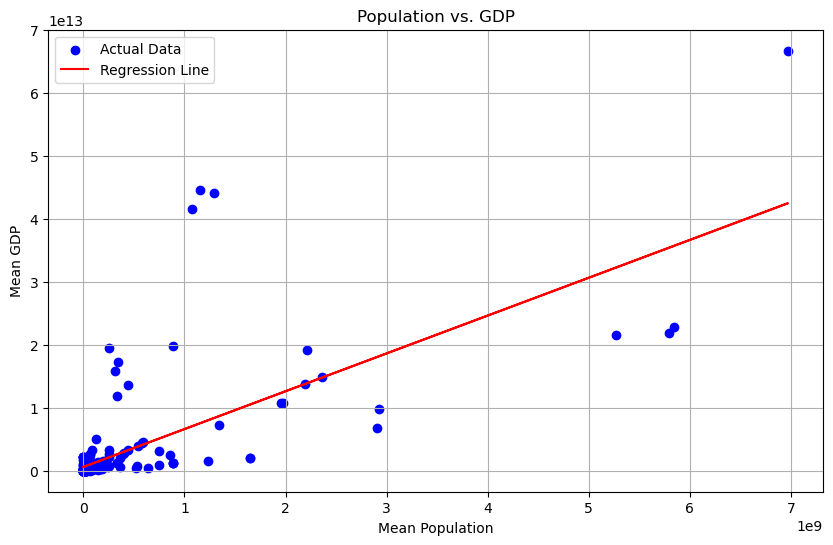

                            OLS Regression Results                            
Dep. Variable:               Mean_GDP   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     270.5
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.54e-42
Time:                        22:01:37   Log-Likelihood:                -8155.1
No. Observations:                 266   AIC:                         1.631e+04
Df Residuals:                     264   BIC:                         1.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.033e+11   3.22e+11     

In [51]:
# # Linear Regression
population = merged_data['Mean_Population']
gdp = merged_data['Mean_GDP']
population_const = sm.add_constant(population)  # Add constant for intercept
model = sm.OLS(gdp, population_const).fit()

# Predict values
predicted_gdp = model.predict(population_const)

plt.figure(figsize=(10, 6))
plt.scatter(population, gdp, label='Actual Data', color='blue')  # Plot actual data
plt.plot(population, predicted_gdp, color='red', label='Regression Line')  # Plot regression line

# Adding labels and title
plt.title('Population vs. GDP')
plt.xlabel('Mean Population')
plt.ylabel('Mean GDP')
plt.legend()
plt.grid(True)
plt.show()

print(model.summary())